In [172]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

#from dstools import data_tools


# for plotting
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 10

In [173]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"


nba = pd.read_csv(url)

In [174]:
new_name_list = ["Game Number", "ID", "League", "Repeat", "Year", "Game Date", "Season Game Number", "Playoffs", "Team Abv", "Franchise", "Points", "Elo_Start", "Elo End", "Win Equiv", "Opp Abv", "Opp Franchise", "Opp Score", "Opp_Elo_Start", "Opp Elo End", "Game Location", "Game Result", "Forecast", "Notes"]

nba.columns = new_name_list

In [175]:
nba.dtypes

Game Number             int64
ID                     object
League                 object
Repeat                  int64
Year                    int64
Game Date              object
Season Game Number      int64
Playoffs                int64
Team Abv               object
Franchise              object
Points                  int64
Elo_Start             float64
Elo End               float64
Win Equiv             float64
Opp Abv                object
Opp Franchise          object
Opp Score               int64
Opp_Elo_Start         float64
Opp Elo End           float64
Game Location          object
Game Result            object
Forecast              float64
Notes                  object
dtype: object

In [176]:
nba = nba[["Year", "Game Date", "Franchise", "Elo_Start","Opp Franchise", "Opp_Elo_Start", "Game Location", "Game Result"]]
nba = nba[nba["Year"]>=2012].copy()

In [177]:
nba["Elo Difference"] = nba.Elo_Start - nba.Opp_Elo_Start

In [178]:
nba['Game Date'] = pd.to_datetime(nba['Game Date'])
nba.head(5)

Year  Game Date  Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116278  2012 2011-12-25       Heat  1652.3988     Mavericks      1678.1997   
116279  2012 2011-12-25  Mavericks  1678.1997          Heat      1652.3988   
116280  2012 2011-12-25   Clippers  1454.1561      Warriors      1493.6945   
116281  2012 2011-12-25   Warriors  1493.6945      Clippers      1454.1561   
116282  2012 2011-12-25     Lakers  1594.3787         Bulls      1632.1742   

       Game Location Game Result  Elo Difference  
116278             A           W        -25.8009  
116279             H           L         25.8009  
116280             A           W        -39.5384  
116281             H           L         39.5384  
116282             H           L        -37.7955

In [179]:
# converting H and A into 1 and 0 for mapping

nba["Game Location"] = nba["Game Location"].str.replace("A","1")
nba["Game Location"] = nba["Game Location"].str.replace("H","0")

# 1 is home
# 0 is away 

In [180]:
def date_diff(nba):
    nba["Game Date Diff"] = nba["Game Date"].diff()
    return nba

#made a function to calculate the difference in games. Have to use .diff() for the individual teams. Can import this function into
# something bigger to go team by team

In [181]:
date_diff(nba)

# The function. The date difference is in the end of the dataframe

Year  Game Date     Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116278  2012 2011-12-25          Heat  1652.3988     Mavericks      1678.1997   
116279  2012 2011-12-25     Mavericks  1678.1997          Heat      1652.3988   
116280  2012 2011-12-25      Clippers  1454.1561      Warriors      1493.6945   
116281  2012 2011-12-25      Warriors  1493.6945      Clippers      1454.1561   
116282  2012 2011-12-25        Lakers  1594.3787         Bulls      1632.1742   
116283  2012 2011-12-25         Bulls  1632.1742        Lakers      1594.3787   
116284  2012 2011-12-25       Celtics  1596.1472        Knicks      1482.5021   
116285  2012 2011-12-25        Knicks  1482.5021       Celtics      1596.1472   
116286  2012 2011-12-25         Magic  1582.5724       Thunder      1620.4620   
116287  2012 2011-12-25       Thunder  1620.4620         Magic      1582.5724   
116288  2012 2011-12-26         Bucks  1490.1206       Hornets      1422.4645   
116289  2012 2011-12-26       Hornets  1422.4645         Bucks      1490.1206   
116290  2012 2011-12-26     Cavaliers  1369.9215       Raptors      1350.1757   
116291  2012 2011-12-26       Raptors  1350.1757     Cavaliers      1369.9215   
116292  2012 2011-12-26       Nuggets  1590.4297     Mavericks      1661.7070   
116293  2012 2011-12-26     Mavericks  1661.7070       Nuggets      1590.4297   
116294  2012 2011-12-26      Warriors  1469.1144         Bulls      1637.1813   
116295  2012 2011-12-26         Bulls  1637.1813      Warriors      1469.1144   
116296  2012 2011-12-26        Pacers  1473.9299       Pistons      1423.3777   
116297  2012 2011-12-26       Pistons  1423.3777        Pacers      1473.9299   
116298  2012 2011-12-26       Thunder  1625.5542  Timberwolves      1328.2598   
116299  2012 2011-12-26  Timberwolves  1328.2598       Thunder      1625.5542   
116300  2012 2011-12-26         Magic  1577.4802       Rockets      1554.6104   
116301  2012 2011-12-26       Rockets  1554.6104         Magic      1577.4802   
116302  2012 2011-12-26      Pelicans  1501.1958          Suns      1496.3531   
116303  2012 2011-12-26          Suns  1496.3531      Pelicans      1501.1958   
116304  2012 2011-12-26        Sixers  1517.6923  Trailblazers      1537.8375   
116305  2012 2011-12-26  Trailblazers  1537.8375        Sixers      1517.6923   
116306  2012 2011-12-26        Lakers  1589.3716         Kings      1441.9906   
116307  2012 2011-12-26         Kings  1441.9906        Lakers      1589.3716   
...      ...        ...           ...        ...           ...            ...   
126284  2015 2015-05-19      Warriors  1787.3469       Rockets      1669.5398   
126285  2015 2015-05-19       Rockets  1669.5398      Warriors      1787.3469   
126286  2015 2015-05-20         Hawks  1613.9390     Cavaliers      1678.9756   
126287  2015 2015-05-20     Cavaliers  1678.9756         Hawks      1613.9390   
126288  2015 2015-05-21      Warriors  1789.7388       Rockets      1667.1479   
126289  2015 2015-05-21       Rockets  1667.1479      Warriors      1789.7388   
126290  2015 2015-05-22         Hawks  1603.6616     Cavaliers      1689.2529   
126291  2015 2015-05-22     Cavaliers  1689.2529         Hawks      1603.6616   
126292  2015 2015-05-23      Warriors  1791.2300       Rockets      1665.6567   
126293  2015 2015-05-23       Rockets  1665.6567      Warriors      1791.2300   
126294  2015 2015-05-24     Cavaliers  1701.5128         Hawks      1591.4017   
126295  2015 2015-05-24         Hawks  1591.4017     Cavaliers      1701.5128   
126296  2015 2015-05-25      Warriors  1813.4543       Rockets      1643.4324   
126297  2015 2015-05-25       Rockets  1643.4324      Warriors      1813.4543   
126298  2015 2015-05-26     Cavaliers  1703.7124         Hawks      1589.2021   
126299  2015 2015-05-26         Hawks  1589.2021     Cavaliers      1703.7124   
126300  2015 2015-05-27       Rockets  1658.9934      Warriors      1797.8933   
126301  2015 2015-05-27      Warriors  

In [182]:
homecourt = nba[nba["Game Location"] == "0"].copy()

awaycourt = nba[nba["Game Location"] == "1"].copy()

# so 0 is home, so mav lost at home when they were the better rated team
# additionally 1 is away where heat won while away and worse rated team

In [183]:
homecourt.head(5)

Year  Game Date  Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116279  2012 2011-12-25  Mavericks  1678.1997          Heat      1652.3988   
116281  2012 2011-12-25   Warriors  1493.6945      Clippers      1454.1561   
116282  2012 2011-12-25     Lakers  1594.3787         Bulls      1632.1742   
116285  2012 2011-12-25     Knicks  1482.5021       Celtics      1596.1472   
116287  2012 2011-12-25    Thunder  1620.4620         Magic      1582.5724   

       Game Location Game Result  Elo Difference Game Date Diff  
116279             0           L         25.8009         0 days  
116281             0           L         39.5384         0 days  
116282             0           L        -37.7955         0 days  
116285             0           W       -113.6451         0 days  
116287             0           W         37.8896         0 days

In [184]:
awaycourt.head(5)

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116278  2012 2011-12-25      Heat  1652.3988     Mavericks      1678.1997   
116280  2012 2011-12-25  Clippers  1454.1561      Warriors      1493.6945   
116283  2012 2011-12-25     Bulls  1632.1742        Lakers      1594.3787   
116284  2012 2011-12-25   Celtics  1596.1472        Knicks      1482.5021   
116286  2012 2011-12-25     Magic  1582.5724       Thunder      1620.4620   

       Game Location Game Result  Elo Difference Game Date Diff  
116278             1           W        -25.8009            NaT  
116280             1           W        -39.5384         0 days  
116283             1           W         37.7955         0 days  
116284             1           L        113.6451         0 days  
116286             1           L        -37.8896         0 days

In [185]:
upsetwins = homecourt[homecourt["Game Result"] == "W"].copy()

# adding an upsetloses variable just to compare 

upsetloss = awaycourt[awaycourt["Game Result"] == "L"].copy()

In [186]:
upsetwins.head(5)

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116285  2012 2011-12-25    Knicks  1482.5021       Celtics      1596.1472   
116287  2012 2011-12-25   Thunder  1620.4620         Magic      1582.5724   
116289  2012 2011-12-26   Hornets  1422.4645         Bucks      1490.1206   
116294  2012 2011-12-26  Warriors  1469.1144         Bulls      1637.1813   
116296  2012 2011-12-26    Pacers  1473.9299       Pistons      1423.3777   

       Game Location Game Result  Elo Difference Game Date Diff  
116285             0           W       -113.6451         0 days  
116287             0           W         37.8896         0 days  
116289             0           W        -67.6561         0 days  
116294             0           W       -168.0669         0 days  
116296             0           W         50.5522         0 days

In [187]:
upsetloss.head(5)

# so e.g. Celtics were better rated team but lost away 

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116284  2012 2011-12-25   Celtics  1596.1472        Knicks      1482.5021   
116286  2012 2011-12-25     Magic  1582.5724       Thunder      1620.4620   
116288  2012 2011-12-26     Bucks  1490.1206       Hornets      1422.4645   
116295  2012 2011-12-26     Bulls  1637.1813      Warriors      1469.1144   
116297  2012 2011-12-26   Pistons  1423.3777        Pacers      1473.9299   

       Game Location Game Result  Elo Difference Game Date Diff  
116284             1           L        113.6451         0 days  
116286             1           L        -37.8896         0 days  
116288             1           L         67.6561         1 days  
116295             1           L        168.0669         0 days  
116297             1           L        -50.5522         0 days

In [188]:
upsetwins = upsetwins[upsetwins["Elo Difference"] < 0]
homecourt = homecourt[homecourt["Game Result"] == "W"]

upsetloss = upsetloss[upsetloss["Elo Difference"] > 0]
awaycourt = awaycourt[awaycourt["Game Result"] == "L"]

In [189]:
upsetwins.head(5)

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116285  2012 2011-12-25    Knicks  1482.5021       Celtics      1596.1472   
116289  2012 2011-12-26   Hornets  1422.4645         Bucks      1490.1206   
116294  2012 2011-12-26  Warriors  1469.1144         Bulls      1637.1813   
116307  2012 2011-12-26     Kings  1441.9906        Lakers      1589.3716   
116331  2012 2011-12-28  Warriors  1480.5741        Knicks      1487.5790   

       Game Location Game Result  Elo Difference Game Date Diff  
116285             0           W       -113.6451         0 days  
116289             0           W        -67.6561         0 days  
116294             0           W       -168.0669         0 days  
116307             0           W       -147.3810         0 days  
116331             0           W         -7.0049         0 days

In [190]:
upsetloss.head(5)

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116284  2012 2011-12-25   Celtics  1596.1472        Knicks      1482.5021   
116288  2012 2011-12-26     Bucks  1490.1206       Hornets      1422.4645   
116295  2012 2011-12-26     Bulls  1637.1813      Warriors      1469.1144   
116306  2012 2011-12-26    Lakers  1589.3716         Kings      1441.9906   
116330  2012 2011-12-28    Knicks  1487.5790      Warriors      1480.5741   

       Game Location Game Result  Elo Difference Game Date Diff  
116284             1           L        113.6451         0 days  
116288             1           L         67.6561         1 days  
116295             1           L        168.0669         0 days  
116306             1           L        147.3810         0 days  
116330             1           L          7.0049         0 days

In [191]:
grpwin = upsetwins.groupby("Franchise")
homecourt_grp = homecourt.groupby("Franchise")

grploss = upsetloss.groupby("Franchise")
awaycourt_grp = awaycourt.groupby("Franchise")

In [192]:
grpwin.get_group("Bucks")

# so here im pulling the Bucks data specifically. May be worth paring the data down into 2000 onward 

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116550  2012 2012-01-10     Bucks  1464.4679         Spurs      1590.3909   
116850  2012 2012-01-28     Bucks  1497.9380        Lakers      1584.8629   
116911  2012 2012-02-01     Bucks  1513.6620          Heat      1664.0696   
117391  2012 2012-03-05     Bucks  1453.9633        Sixers      1560.3737   
117452  2012 2012-03-09     Bucks  1457.7206        Knicks      1484.8418   
117754  2012 2012-03-27     Bucks  1503.3854         Hawks      1540.2170   
118651  2013 2012-11-14     Bucks  1523.7825        Pacers      1538.7845   
118904  2013 2012-12-01     Bucks  1494.5220       Celtics      1551.2551   
119153  2013 2012-12-18     Bucks  1488.1533        Pacers      1559.1743   
119311  2013 2012-12-29     Bucks  1484.0557          Heat      1652.7982   
119712  2013 2013-01-26     Bucks  1492.6725      Warriors      1542.4263   
120208  2013 2013-03-04     Bucks  1479.1959          Jazz      1501.4167   
120435  2013 2013-03-19     Bucks  1473.0045  Trailblazers      1496.9957   
120569  2013 2013-03-28     Bucks  1450.7166        Lakers      1535.6357   
121541  2014 2013-11-30     Bucks  1346.5284       Celtics      1451.9872   
121846  2014 2013-12-21     Bucks  1333.2552        Sixers      1333.8198   
122298  2014 2014-01-22     Bucks  1311.9215       Pistons      1394.9707   
122478  2014 2014-02-03     Bucks  1276.7991        Knicks      1455.6646   
122645  2014 2014-02-18     Bucks  1261.9089         Magic      1328.6581   
122836  2014 2014-03-03     Bucks  1273.5385          Jazz      1441.2152   
122942  2014 2014-03-10     Bucks  1279.4357         Magic      1333.2356   
123196  2014 2014-03-27     Bucks  1266.2106        Lakers      1369.7268   
123417  2014 2014-04-11     Bucks  1256.8728     Cavaliers      1457.9248   
123867  2015 2014-11-08     Bucks  1330.1069     Grizzlies      1620.6356   
123903  2015 2014-11-11     Bucks  1337.2568       Thunder      1575.3979   
124002  2015 2014-11-18     Bucks  1361.0579        Knicks      1466.4933   
124252  2015 2014-12-05     Bucks  1400.7633          Heat      1518.5510   
124378  2015 2014-12-13     Bucks  1411.0632      Clippers      1666.1897   
125109  2015 2015-01-31     Bucks  1517.7402  Trailblazers      1616.8949   
125800  2015 2015-03-24     Bucks  1454.9366          Heat      1481.4974   
125834  2015 2015-03-26     Bucks  1457.9591        Pacers      1465.4594   
125920  2015 2015-04-01     Bucks  1453.5896         Bulls      1554.4697   
126088  2015 2015-04-12     Bucks  1458.2212          Nets      1500.6542   
126199  2015 2015-04-25     Bucks  1456.3048         Bulls      1599.0778   

       Game Location Game Result  Elo Difference Game Date Diff  
116550             0           W       -125.9230         0 days  
116850             0           W        -86.9249         0 days  
116911             0           W       -150.4076         0 days  
117391             0           W       -106.4104         0 days  
117452             0           W        -27.1212         0 days  
117754             0           W        -36.8316         0 days  
118651             0           W        -15.0020         0 days  
118904             0           W        -56.7331         0 days  
119153             0           W        -71.0210         0 days  
119311             0           W       -168.7425         0 days  
119712             0           W        -49.7538         0 days  
120208             0           W        -22.2208         0 days  
120435             0           W        -23.9912         0 days  
120569             0           W        -84.9191         0 days  
121541             0           W       -105.4588         0 days  
121846             0           W         -0.5646         0 days  
122298             0           W        -83.0492         0 days  
122478             0           W       -178.8655         0 days  
122645             0           W        -66.7492         0

In [193]:
BucksWin = grpwin.get_group("Bucks")

In [194]:
HeatLoss = grploss.get_group("Heat")

In [195]:
HeatLoss.head(5)

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116545  2012 2012-01-10      Heat  1680.0361      Warriors      1446.0071   
116570  2012 2012-01-11      Heat  1669.2551      Clippers      1488.8319   
116600  2012 2012-01-13      Heat  1659.1111       Nuggets      1602.9078   
116910  2012 2012-02-01      Heat  1664.0696         Bucks      1513.6620   
117034  2012 2012-02-08      Heat  1675.1896         Magic      1540.6930   

       Game Location Game Result  Elo Difference Game Date Diff  
116545             1           L        234.0290         0 days  
116570             1           L        180.4232         0 days  
116600             1           L         56.2033         0 days  
116910             1           L        150.4076         0 days  
117034             1           L        134.4966         0 days

In [196]:
BucksWin.count()

Year              34
Game Date         34
Franchise         34
Elo_Start         34
Opp Franchise     34
Opp_Elo_Start     34
Game Location     34
Game Result       34
Elo Difference    34
Game Date Diff    34
dtype: int64

In [197]:
BucksWin

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116550  2012 2012-01-10     Bucks  1464.4679         Spurs      1590.3909   
116850  2012 2012-01-28     Bucks  1497.9380        Lakers      1584.8629   
116911  2012 2012-02-01     Bucks  1513.6620          Heat      1664.0696   
117391  2012 2012-03-05     Bucks  1453.9633        Sixers      1560.3737   
117452  2012 2012-03-09     Bucks  1457.7206        Knicks      1484.8418   
117754  2012 2012-03-27     Bucks  1503.3854         Hawks      1540.2170   
118651  2013 2012-11-14     Bucks  1523.7825        Pacers      1538.7845   
118904  2013 2012-12-01     Bucks  1494.5220       Celtics      1551.2551   
119153  2013 2012-12-18     Bucks  1488.1533        Pacers      1559.1743   
119311  2013 2012-12-29     Bucks  1484.0557          Heat      1652.7982   
119712  2013 2013-01-26     Bucks  1492.6725      Warriors      1542.4263   
120208  2013 2013-03-04     Bucks  1479.1959          Jazz      1501.4167   
120435  2013 2013-03-19     Bucks  1473.0045  Trailblazers      1496.9957   
120569  2013 2013-03-28     Bucks  1450.7166        Lakers      1535.6357   
121541  2014 2013-11-30     Bucks  1346.5284       Celtics      1451.9872   
121846  2014 2013-12-21     Bucks  1333.2552        Sixers      1333.8198   
122298  2014 2014-01-22     Bucks  1311.9215       Pistons      1394.9707   
122478  2014 2014-02-03     Bucks  1276.7991        Knicks      1455.6646   
122645  2014 2014-02-18     Bucks  1261.9089         Magic      1328.6581   
122836  2014 2014-03-03     Bucks  1273.5385          Jazz      1441.2152   
122942  2014 2014-03-10     Bucks  1279.4357         Magic      1333.2356   
123196  2014 2014-03-27     Bucks  1266.2106        Lakers      1369.7268   
123417  2014 2014-04-11     Bucks  1256.8728     Cavaliers      1457.9248   
123867  2015 2014-11-08     Bucks  1330.1069     Grizzlies      1620.6356   
123903  2015 2014-11-11     Bucks  1337.2568       Thunder      1575.3979   
124002  2015 2014-11-18     Bucks  1361.0579        Knicks      1466.4933   
124252  2015 2014-12-05     Bucks  1400.7633          Heat      1518.5510   
124378  2015 2014-12-13     Bucks  1411.0632      Clippers      1666.1897   
125109  2015 2015-01-31     Bucks  1517.7402  Trailblazers      1616.8949   
125800  2015 2015-03-24     Bucks  1454.9366          Heat      1481.4974   
125834  2015 2015-03-26     Bucks  1457.9591        Pacers      1465.4594   
125920  2015 2015-04-01     Bucks  1453.5896         Bulls      1554.4697   
126088  2015 2015-04-12     Bucks  1458.2212          Nets      1500.6542   
126199  2015 2015-04-25     Bucks  1456.3048         Bulls      1599.0778   

       Game Location Game Result  Elo Difference Game Date Diff  
116550             0           W       -125.9230         0 days  
116850             0           W        -86.9249         0 days  
116911             0           W       -150.4076         0 days  
117391             0           W       -106.4104         0 days  
117452             0           W        -27.1212         0 days  
117754             0           W        -36.8316         0 days  
118651             0           W        -15.0020         0 days  
118904             0           W        -56.7331         0 days  
119153             0           W        -71.0210         0 days  
119311             0           W       -168.7425         0 days  
119712             0           W        -49.7538         0 days  
120208             0           W        -22.2208         0 days  
120435             0           W        -23.9912         0 days  
120569             0           W        -84.9191         0 days  
121541             0           W       -105.4588         0 days  
121846             0           W         -0.5646         0 days  
122298             0           W        -83.0492         0 days  
122478             0           W       -178.8655         0 days  
122645             0           W        -66.7492         0

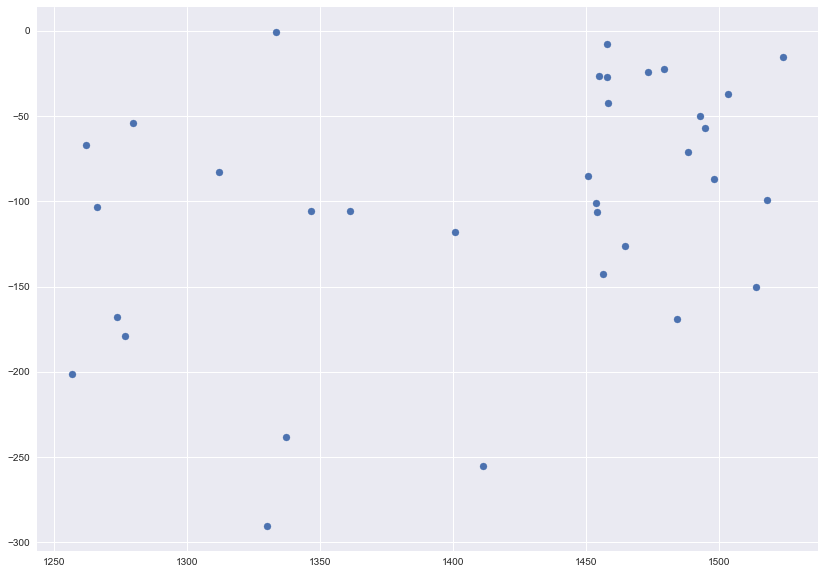

In [198]:
plt.scatter(x=BucksWin['Elo_Start'] ,y=BucksWin['Elo Difference'])

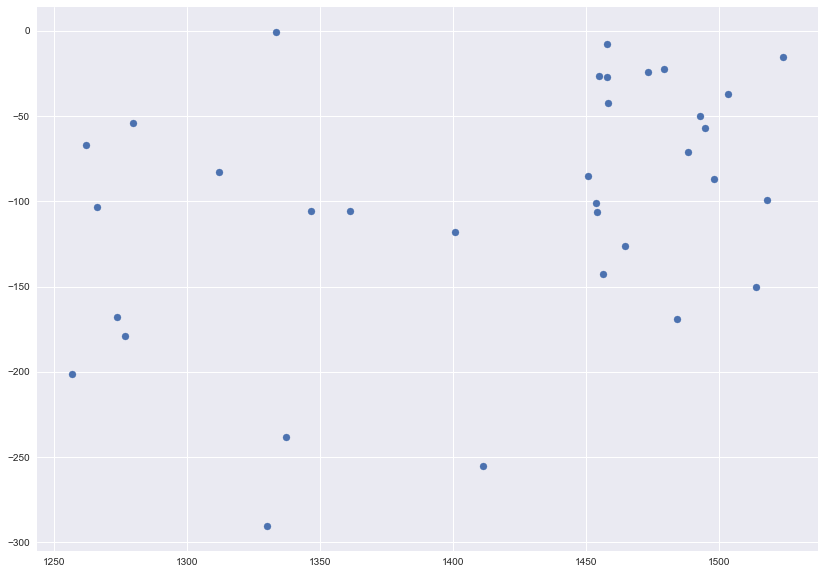

In [199]:
import seaborn as sns
plt.scatter(x ='Elo_Start' ,y ='Elo Difference', data = BucksWin)

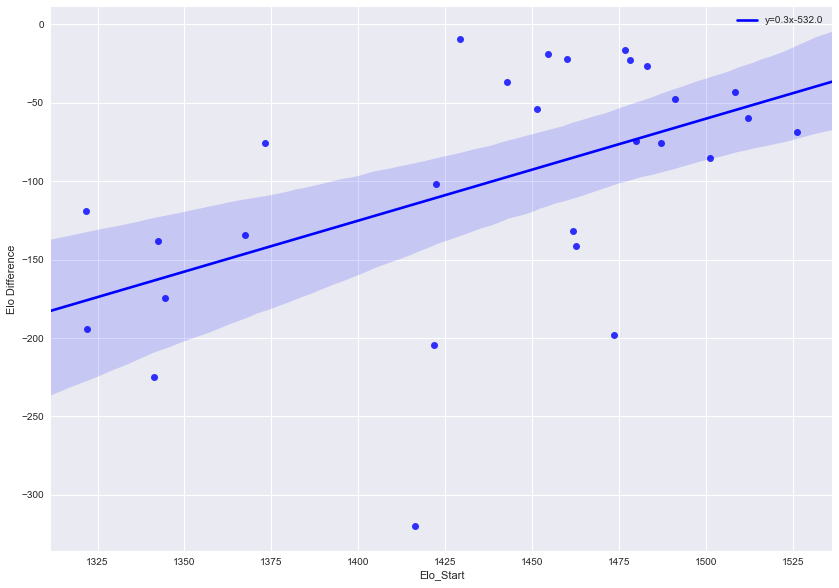

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(BucksWin['Elo_Start'],BucksWin['Elo Difference'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Elo_Start", y="Elo Difference", data= Bucks, color='b', 
 line_kws={'label':"y={0:.1f}x{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [201]:

def Plot_Data(data, v1, v2, tv):
    # Make the plot square
    plt.rcParams['figure.figsize'] = [50, 300]
    
    # Color
    color = ["red" if x == 0 else "blue" for x in data[tv]]
    
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) , max(data[v1]) ])
    plt.ylim([min(data[v2]) , max(data[v2]) ])
    

In [202]:
# We can see that the Bucks simply do not have a large amount of home upsets, especially since many of their wins come from
# when they were ranked below the skill of an average team. Now we are going to test on a team known for home court, the Nuggets

In [203]:
NuggetsWin = grpwin.get_group("Nuggets")

In [204]:
NuggetsWin.head(5)
NuggetsWin.count()

Year              30
Game Date         30
Franchise         30
Elo_Start         30
Opp Franchise     30
Opp_Elo_Start     30
Game Location     30
Game Result       30
Elo Difference    30
Game Date Diff    30
dtype: int64

In [205]:
NuggetsWin

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116601  2012 2012-01-13   Nuggets  1602.9078          Heat      1659.1111   
117304  2012 2012-02-29   Nuggets  1543.2351  Trailblazers      1559.8066   
118299  2012 2012-05-04   Nuggets  1589.9498        Lakers      1597.6793   
119078  2013 2012-12-14   Nuggets  1568.0780     Grizzlies      1624.1719   
119144  2013 2012-12-18   Nuggets  1588.0087         Spurs      1694.2546   
119338  2013 2013-01-01   Nuggets  1596.6877      Clippers      1680.6113   
119625  2013 2013-01-20   Nuggets  1600.2618       Thunder      1716.2355   
120159  2013 2013-03-01   Nuggets  1631.2975       Thunder      1694.3900   
120250  2013 2013-03-07   Nuggets  1645.3600      Clippers      1656.1141   
122020  2014 2014-01-03   Nuggets  1496.0845     Grizzlies      1506.9869   
122108  2014 2014-01-09   Nuggets  1529.8219       Thunder      1698.0581   
122344  2014 2014-01-25   Nuggets  1519.0168        Pacers      1677.1168   
122472  2014 2014-02-03   Nuggets  1518.3990      Clippers      1653.2614   
122862  2014 2014-03-05   Nuggets  1408.3430     Mavericks      1565.9469   
123048  2014 2014-03-17   Nuggets  1433.7753      Clippers      1702.2345   
123131  2014 2014-03-23   Nuggets  1451.0139       Wizards      1533.9598   
123278  2014 2014-04-02   Nuggets  1436.5289      Pelicans      1447.0892   
123381  2014 2014-04-09   Nuggets  1447.1504       Rockets      1654.6027   
124012  2015 2014-11-19   Nuggets  1457.1604       Thunder      1529.6217   
124040  2015 2014-11-21   Nuggets  1464.7407      Pelicans      1498.9872   
124100  2015 2014-11-25   Nuggets  1486.8259         Bulls      1559.7631   
124142  2015 2014-11-28   Nuggets  1488.8198          Suns      1567.8978   
124331  2015 2014-12-10   Nuggets  1485.8118          Heat      1507.1877   
124460  2015 2014-12-19   Nuggets  1482.5414      Clippers      1657.8870   
124683  2015 2015-01-03   Nuggets  1443.1624     Grizzlies      1636.6675   
124846  2015 2015-01-14   Nuggets  1494.5588     Mavericks      1618.6863   
125474  2015 2015-03-03   Nuggets  1353.3379         Bucks      1515.5642   
125597  2015 2015-03-11   Nuggets  1384.7147         Hawks      1664.5294   
125628  2015 2015-03-13   Nuggets  1405.8357      Warriors      1743.7177   
125841  2015 2015-03-27   Nuggets  1418.0474          Jazz      1531.2625   

       Game Location Game Result  Elo Difference Game Date Diff  
116601             0           W        -56.2033         0 days  
117304             0           W        -16.5715         0 days  
118299             0           W         -7.7295         0 days  
119078             0           W        -56.0939         0 days  
119144             0           W       -106.2459         0 days  
119338             0           W        -83.9236         1 days  
119625             0           W       -115.9737         0 days  
120159             0           W        -63.0925         0 days  
120250             0           W        -10.7541         1 days  
122020             0           W        -10.9024         0 days  
122108             0           W       -168.2362         1 days  
122344             0           W       -158.1000         0 days  
122472             0           W       -134.8624         0 days  
122862             0           W       -157.6039         0 days  
123048             0           W       -268.4592         0 days  
123131             0           W        -82.9459         0 days  
123278             0           W        -10.5603         0 days  
123381             0           W       -207.4523         0 days  
124012             0           W        -72.4613         0 days  
124040             0           W        -34.2465         0 days  
124100             0           W        -72.9372         1 days  
124142             0           W        -79.0780         0 days  
124331             0           W        -21.3759         0 days  
124460             0           W    

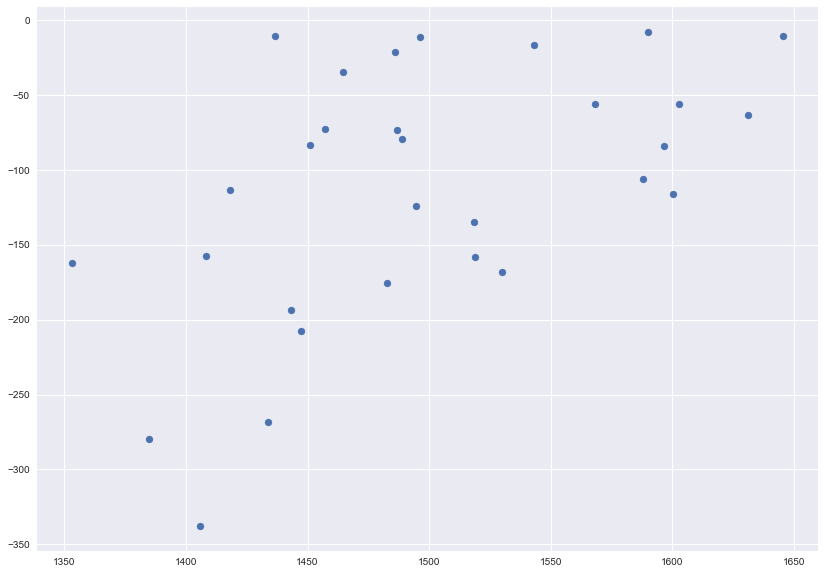

In [206]:
plt.scatter(x=NuggetsWin['Elo_Start'] ,y=NuggetsWin['Elo Difference'])

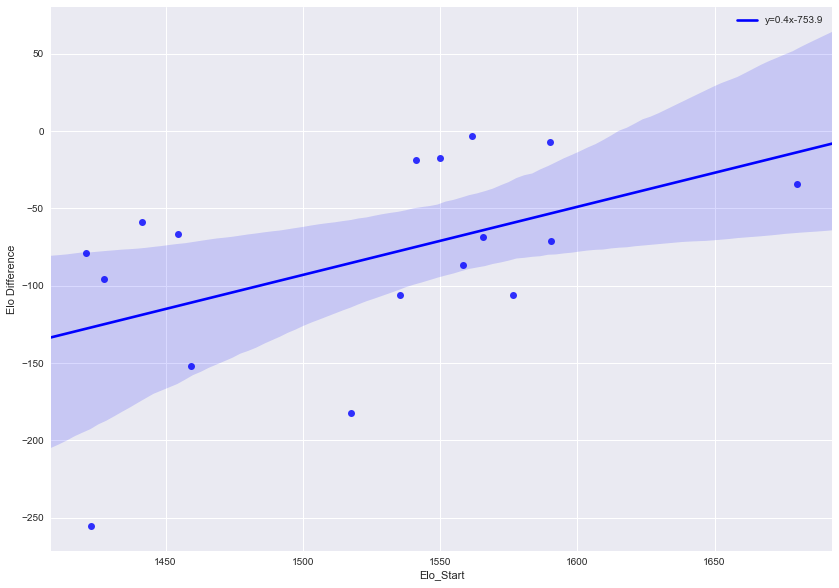

In [207]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(Nuggets['Elo_Start'],Nuggets['Elo Difference'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Elo_Start", y="Elo Difference", data= Nuggets, color='b', 
 line_kws={'label':"y={0:.1f}x{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [208]:
BucksHome = homecourt_grp.get_group("Bucks")

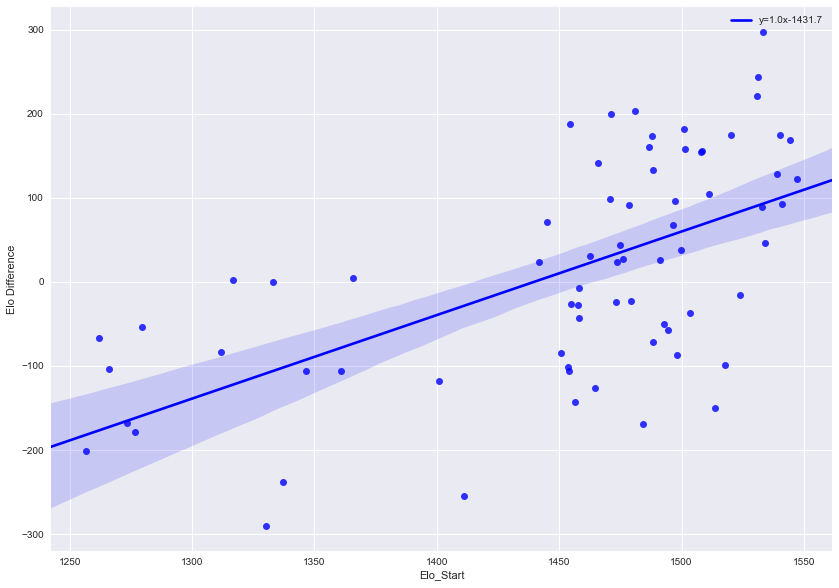

In [209]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(BucksHome['Elo_Start'],BucksHome['Elo Difference'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Elo_Start", y="Elo Difference", data= BucksHome, color='b', 
 line_kws={'label':"y={0:.1f}x{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

# this graph is all home court wins regardless of relative team skill 

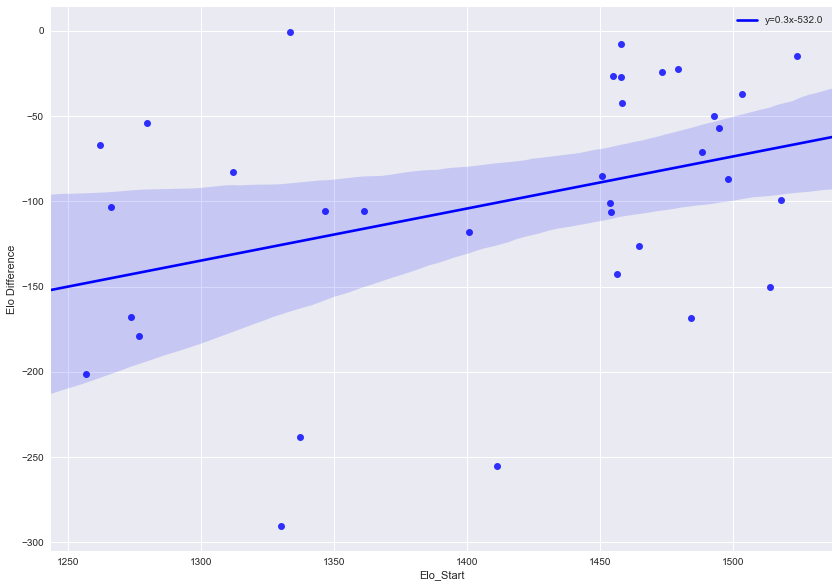

In [216]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(BucksWin['Elo_Start'],BucksWin['Elo Difference'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Elo_Start", y="Elo Difference", data= BucksWin, color='b', 
 line_kws={'label':"y={0:.1f}x{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [211]:
# find it odd that its all 0 game diff. Going to check on upset losses and see if it is actually that way or if program 
# is messing up

In [212]:
HeatLoss

Year  Game Date Franchise  Elo_Start Opp Franchise  Opp_Elo_Start  \
116545  2012 2012-01-10      Heat  1680.0361      Warriors      1446.0071   
116570  2012 2012-01-11      Heat  1669.2551      Clippers      1488.8319   
116600  2012 2012-01-13      Heat  1659.1111       Nuggets      1602.9078   
116910  2012 2012-02-01      Heat  1664.0696         Bucks      1513.6620   
117034  2012 2012-02-08      Heat  1675.1896         Magic      1540.6930   
117352  2012 2012-03-02      Heat  1729.0259          Jazz      1473.3824   
117374  2012 2012-03-04      Heat  1722.4690        Lakers      1596.5558   
117524  2012 2012-03-13      Heat  1716.2075         Magic      1581.3556   
117528  2012 2012-03-14      Heat  1707.4578         Bulls      1691.1976   
117725  2012 2012-03-25      Heat  1720.2264       Thunder      1663.0526   
117736  2012 2012-03-26      Heat  1708.3007        Pacers      1557.7964   
117830  2012 2012-04-01      Heat  1703.0592       Celtics      1564.5516   
118211  2012 2012-04-24      Heat  1661.8193       Celtics      1605.4044   
118257  2012 2012-04-26      Heat  1651.9784       Wizards      1393.6378   
118314  2012 2012-05-06      Heat  1646.7318        Knicks      1537.6729   
118363  2012 2012-05-17      Heat  1642.8645        Pacers      1606.8142   
118401  2012 2012-06-01      Heat  1679.9183       Celtics      1626.9720   
118404  2012 2012-06-03      Heat  1671.2635       Celtics      1635.6268   
118469  2013 2012-11-02      Heat  1666.3193        Knicks      1529.6180   
118608  2013 2012-11-11      Heat  1667.3300     Grizzlies      1607.0181   
118649  2013 2012-11-14      Heat  1658.7794      Clippers      1587.7803   
118936  2013 2012-12-04      Heat  1678.8413       Wizards      1367.1693   
119278  2013 2012-12-28      Heat  1669.2677       Pistons      1422.0345   
119310  2013 2012-12-29      Heat  1652.7982         Bucks      1484.0557   
119446  2013 2013-01-08      Heat  1625.6565        Pacers      1568.2610   
119479  2013 2013-01-10      Heat  1616.8455  Trailblazers      1481.1284   
119546  2013 2013-01-14      Heat  1624.5492          Jazz      1529.2026   
119726  2013 2013-01-27      Heat  1648.5098       Celtics      1489.9819   
119798  2013 2013-02-01      Heat  1658.4253        Pacers      1559.2886   
120541  2013 2013-03-27      Heat  1767.9983         Bulls      1520.7982   
...      ...        ...       ...        ...           ...            ...   
121606  2014 2013-12-05      Heat  1688.9154         Bulls      1524.4799   
121680  2014 2013-12-10      Heat  1691.3087        Pacers      1668.3286   
121919  2014 2013-12-27      Heat  1701.3536         Kings      1387.1931   
122111  2014 2014-01-09      Heat  1691.2142        Knicks      1461.2349   
122115  2014 2014-01-10      Heat  1675.4910          Nets      1445.4980   
122204  2014 2014-01-15      Heat  1660.7424       Wizards      1487.3230   
122263  2014 2014-01-20      Heat  1652.3451         Hawks      1487.5908   
122559  2014 2014-02-08      Heat  1658.4606          Jazz      1426.2109   
122847  2014 2014-03-04      Heat  1712.0123       Rockets      1653.1632   
122881  2014 2014-03-06      Heat  1707.2379         Spurs      1664.7313   
122921  2014 2014-03-09      Heat  1692.3541         Bulls      1555.8125   
123065  2014 2014-03-19      Heat  1672.3112       Celtics      1363.8213   
123124  2014 2014-03-22      Heat  1663.0295      Pelicans      1425.6698   
123176  2014 2014-03-26      Heat  1649.3158        Pacers      1590.9003   
123384  2014 2014-04-09      Heat  1656.3715     Grizzlies      1598.4485   
123431  2014 2014-04-12      Heat  1654.5598         Hawks      1461.2000   
123479  2014 2014-04-14      Heat  1637.8430       Wizards      1518.4086   
123635  2014 2014-05-10      Heat  1629.2341          Nets      1519.5977   
123659  2014 2014-05-18      Heat  1626.1431        Pacers      1553.9567   
123674  2014 2014-05-28      Heat  1634.7363        Pacers      1545.3634   
1238

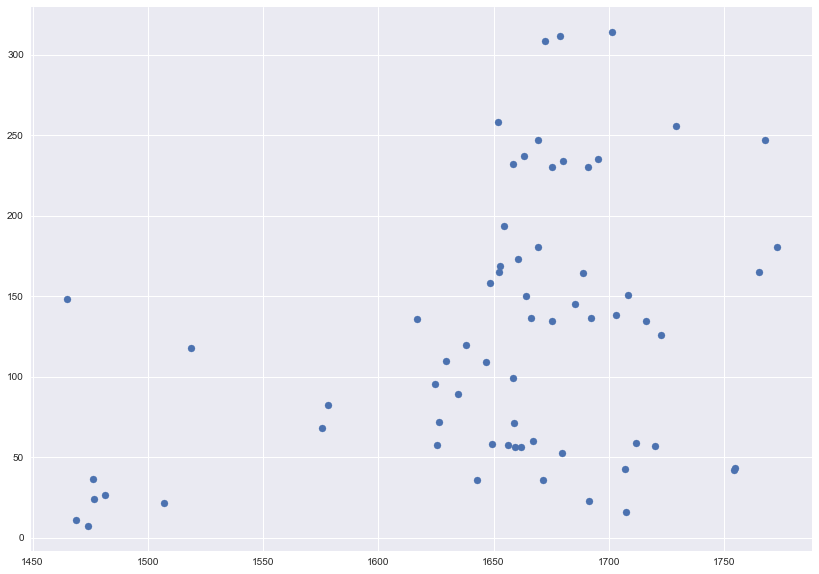

In [213]:
plt.scatter(x=HeatLoss['Elo_Start'] ,y=HeatLoss['Elo Difference'])

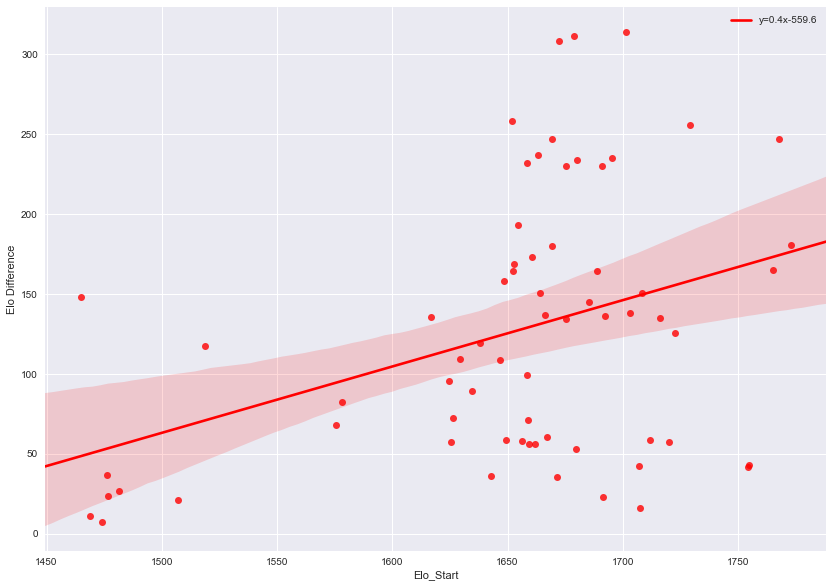

In [215]:
slope, intercept, r_value, p_value, std_err = stats.linregress(HeatLoss['Elo_Start'],HeatLoss['Elo Difference'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Elo_Start", y="Elo Difference", data= HeatLoss, color='r', 
 line_kws={'label':"y={0:.1f}x{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#shows losses when favored away